## Imports

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Loading the data

In [58]:
!unzip /content/Dataset-20230129T215432Z-001.zip

Archive:  /content/Dataset-20230129T215432Z-001.zip
replace Dataset/sesion_03_20/sensor03_water.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Dataset/sesion_03_20/sensor03_water.txt  
replace Dataset/sesion_07_20/sensor07_water.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/sesion_07_20/sensor07_water.txt  
  inflating: Dataset/sesion_03_20/sensor03_air.txt  
  inflating: Dataset/sesion_03_20/sensor03_izopropanol.txt  
  inflating: Dataset/sesion_07_20/sensor07_izopropanol.txt  
  inflating: Dataset/sesion_08_20/sensor08_izopropanol.txt  
  inflating: Dataset/sesion_08_20/sensor08_water.txt  
  inflating: Dataset/sesion_07_20/sensor07_air.txt  
  inflating: Dataset/sesion_08_20/sensor08_air.txt  
  inflating: Dataset/sesion_02_20/sensor02_izopropanol.txt  
  inflating: Dataset/sesion_05_20/sensor05_izopropanol.txt  
  inflating: Dataset/sesion_04_20/sensor04_water.txt  
  inflating: Dataset/sesion_04_20/sensor04_izopropanol.txt  
  inflating: Dataset/sesi

In [59]:
from pandas.core.internals import concat
x = pd.read_csv('/content/Dataset/sesion_01_20/sensor01_air.txt', sep=",", names=['lambda [m]','P/Pref [dB]'])
x

,lambda [m],P/Pref [dB]
0,0.000001,9.1792
1,0.000001,9.2003
2,0.000001,9.1968
3,0.000001,9.1028
4,0.000001,9.0601
...,...,...
2996,0.000002,3.8310
2997,0.000002,3.8613
2998,0.000002,3.8361
2999,0.000002,3.9466


In [60]:
#air signals
df = pd.DataFrame({'lambda [m]' : [], 'P/Pref [dB]' : []})
for i in range(1,10):
  i = str(i)
  path = '/content/Dataset/sesion_0'+i+'_20/sensor0'+i+'_air.txt'
  x = pd.read_csv(path, sep=",", header=None)
  x = x.iloc[:, [0, 1]] # select only the first two columns
  x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
  df = df.append(x, ignore_index=True)
path = '/content/Dataset/sesion_10_20/sensor10_air.txt'
x = pd.read_csv(path, sep=",", header=None)
x = x.iloc[:, [0, 1]] # select only the first two columns
x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
df_air = df.append(x)

#izopropanol signals
df = pd.DataFrame({'lambda [m]' : [], 'P/Pref [dB]' : []})
for i in range(1,10):
  i = str(i)
  path = '/content/Dataset/sesion_0'+i+'_20/sensor0'+i+'_izopropanol.txt'
  x = pd.read_csv(path, sep=",", header=None)
  x = x.iloc[:, [0, 1]] # select only the first two columns
  x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
  df = df.append(x, ignore_index=True)
path = '/content/Dataset/sesion_10_20/sensor10_izopropanol.txt'
x = pd.read_csv(path, sep=",", header=None)
x = x.iloc[:, [0, 1]] # select only the first two columns
x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
df_izopropanol = df.append(x)

#water signals
df = pd.DataFrame({'lambda [m]' : [], 'P/Pref [dB]' : []})
for i in range(1,10):
  i = str(i)
  path = '/content/Dataset/sesion_0'+i+'_20/sensor0'+i+'_water.txt'
  x = pd.read_csv(path, sep=",", header=None)
  x = x.iloc[:, [0, 1]] # select only the first two columns
  x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
  df = df.append(x, ignore_index=True)
path = '/content/Dataset/sesion_10_20/sensor10_water.txt'
x = pd.read_csv(path, sep=",", header=None)
x = x.iloc[:, [0, 1]] # select only the first two columns
x.columns = ['lambda [m]', 'P/Pref [dB]'] # rename columns
df_water = df.append(x)

## Visualisation and statistics

### Statistics

In [61]:
# Calculate the mean and standard deviation of the wavelength and amplitude columns
#air
wavelength_mean = df_air["lambda [m]"].mean()
wavelength_std = df_air["lambda [m]"].std()
amplitude_mean = df_air["P/Pref [dB]"].mean()
amplitude_std = df_air["P/Pref [dB]"].std()
#water
wavelength_mean1 = df_water["lambda [m]"].mean()
wavelength_std1 = df_water["lambda [m]"].std()
amplitude_mean1 = df_water["P/Pref [dB]"].mean()
amplitude_std1 = df_water["P/Pref [dB]"].std()
#isopropanol
wavelength_mean2 = df_izopropanol["lambda [m]"].mean()
wavelength_std2 = df_izopropanol["lambda [m]"].std()
amplitude_mean2 = df_izopropanol["P/Pref [dB]"].mean()
amplitude_std2 = df_izopropanol["P/Pref [dB]"].std()

# Print the results
print("Mean of wavelength - air:", wavelength_mean)
print("Standard deviation of wavelength - air:", wavelength_std)
print("Mean of amplitude- air:", amplitude_mean)
print("Standard deviation of amplitude - air:", amplitude_std)
print("-----")
print("Mean of wavelength - water:", wavelength_mean1)
print("Standard deviation of wavelength - water:", wavelength_std1)
print("Mean of amplitude- water:", amplitude_mean1)
print("Standard deviation of amplitude - water:", amplitude_std1)
print("-----")
print("Mean of wavelength - izopropylen:", wavelength_mean2)
print("Standard deviation of wavelength - izopropylen:", wavelength_std2)
print("Mean of amplitude- izopropylen:", amplitude_mean2)
print("Standard deviation of amplitude - izopropylen:", amplitude_std2)


Mean of wavelength - air: 1.5e-06
Standard deviation of wavelength - air: 8.663284649392039e-08
Mean of amplitude- air: 0.7998093973255583
Standard deviation of amplitude - air: 4.903714115482927
-----
Mean of wavelength - water: 1.5e-06
Standard deviation of wavelength - water: 8.663284649392039e-08
Mean of amplitude- water: -1.7177246813838725
Standard deviation of amplitude - water: 6.560503506794391
-----
Mean of wavelength - izopropylen: 1.5e-06
Standard deviation of wavelength - izopropylen: 8.663284649392039e-08
Mean of amplitude- izopropylen: -1.7655549531302899
Standard deviation of amplitude - izopropylen: 6.973005124027046


### Heatmap

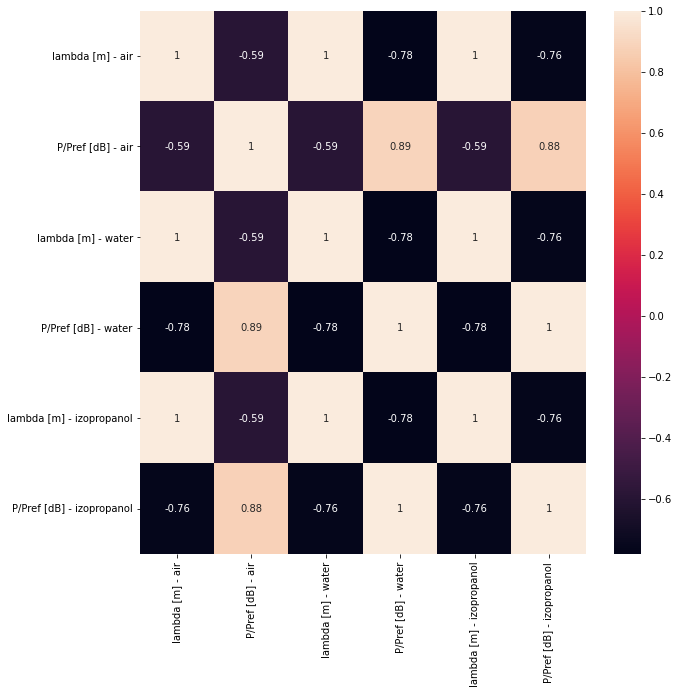

In [62]:
df_water_colnames = df_water.rename(columns={'lambda [m]': 'lambda [m] - water', 'P/Pref [dB]': 'P/Pref [dB] - water'})
df_izopropanol_colnames = df_izopropanol.rename(columns={'lambda [m]': 'lambda [m] - izopropanol', 'P/Pref [dB]': 'P/Pref [dB] - izopropanol'})
df_air_colnames = df_air.rename(columns={'lambda [m]': 'lambda [m] - air', 'P/Pref [dB]': 'P/Pref [dB] - air'})

signals_data = pd.concat([df_air_colnames, df_water_colnames, df_izopropanol_colnames], axis=1)

# Create a correlation matrix for the signals
corr = signals_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

### 10 sensors data plots

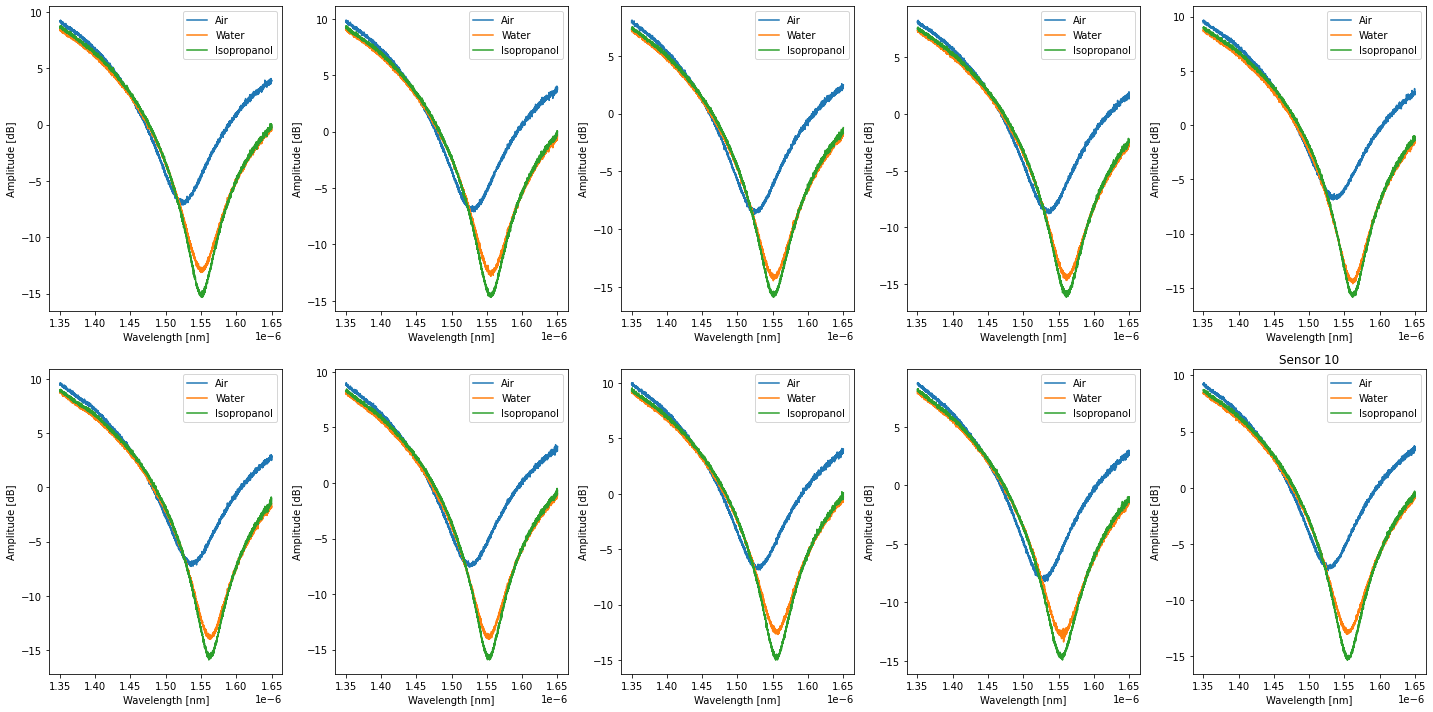

In [88]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()

# Divide the rows of signals_data into 10 separate dataframes, each representing the data from one sensor
for i, ax in enumerate(axs):
    sensor_data = signals_data.iloc[i * 3001:(i + 1) * 3001, :]
    air_wavelength = sensor_data['lambda [m] - air']
    air_amplitude = sensor_data['P/Pref [dB] - air']
    water_wavelength = sensor_data['lambda [m] - water']
    water_amplitude = sensor_data['P/Pref [dB] - water']
    isopropanol_wavelength = sensor_data['lambda [m] - izopropanol']
    isopropanol_amplitude = sensor_data['P/Pref [dB] - izopropanol']
# Plot the data for each sensor
    ax.plot(air_wavelength, air_amplitude, label='Air')
    ax.plot(water_wavelength, water_amplitude, label='Water')
    ax.plot(isopropanol_wavelength, isopropanol_amplitude, label='Isopropanol')
    ax.set_xlabel('Wavelength [nm]')
    ax.set_ylabel('Amplitude [dB]')
    ax.legend()
    plt.title('Sensor {}'.format(i+1))

plt.tight_layout()
plt.show()

## PCA

In [67]:
# Standardize data - ensuring that all features are on the same scale and contribute equally to the PCA analysis
df_air_standardized = (df_air - df_air.mean()) / df_air.std()
df_water_standardized = (df_water - df_water.mean()) / df_water.std()
df_izopropanol_standardized = (df_izopropanol - df_izopropanol.mean()) / df_izopropanol.std()

In [68]:
# Apply PCA
pca = PCA()
df_air_pca = pca.fit_transform(df_air_standardized)
df_water_pca = pca.fit_transform(df_water_standardized)
df_izopropanol_pca = pca.fit_transform(df_izopropanol_standardized)

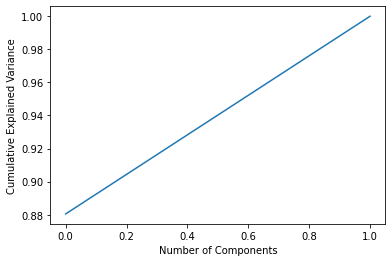

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

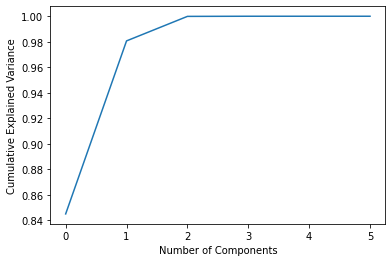

In [70]:
combined_data = pd.concat([df_air_standardized, df_water_standardized, df_izopropanol_standardized], axis=1)
pca = PCA()
df_pca = pca.fit_transform(combined_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

## Ridge Regression

In [71]:
#Extract input features (signal in air) and targets (signal in water and izopropanol)
X = df_air.values
y_water = df_water.values
y_izopropanol = df_izopropanol.values
y = np.hstack([y_water, y_izopropanol])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [72]:
# Train the multi-output ridge regression model with hyperparameters
regr = MultiOutputRegressor(Ridge())
param_grid = {'estimator__alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(regr, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MultiOutputRegressor(estimator=Ridge()),
             param_grid={'estimator__alpha': [0.01, 0.1, 1, 10, 100]})

In [73]:
# Make predictions
y_train_pred = best_regr.predict(X_train)
y_test_pred = best_regr.predict(X_test)

# Calculate MSE for training data
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", train_mse)
# Calculate MSE for test data
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

# Calculate MAE for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", train_mae)
# Calculate MAE for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", test_mae)

# Calculate R2 score for training data
train_r2 = r2_score(y_train, y_train_pred)
print("Train R2:", train_r2)
# Calculate R2 score for test data
test_r2 = r2_score(y_test, y_test_pred)
print("Test R2:", test_r2)

# Calculate explained variance score for training data
train_evs = explained_variance_score(y_train, y_train_pred)
print("Train Explained Variance:", train_evs)
# Calculate explained variance score for test data
test_evs = explained_variance_score(y_test, y_test_pred)
print("Test Explained Variance:", test_evs)

Train MSE: 4.952006108479151
Test MSE: 5.003979618270218
Train MAE: 1.327384244704274
Test MAE: 1.328981305352131
Train R2: 0.5665191274019794
Test R2: 0.5747646620562252
Train Explained Variance: 0.566523348073217
Test Explained Variance: 0.5749005612019545


## Random Forest model

In [74]:
# Train the multi-output regression model with 5-fold cross-validation in order to perevt overfitting
kf = KFold(n_splits=5, random_state=0, shuffle=True)
mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, min_samples_split=5, min_samples_leaf=5))
    regr.fit(X_train, y_train)

In [75]:
# Make predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculate MSE for training data
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", train_mse)
# Calculate MSE for test data
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

# Calculate MAE for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", train_mae)
# Calculate MAE for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", test_mae)

# Calculate R2 score for training data
train_r2 = r2_score(y_train, y_train_pred)
print("Train R2:", train_r2)
# Calculate R2 score for test data
test_r2 = r2_score(y_test, y_test_pred)
print("Test R2:", test_r2)

# Calculate explained variance score for training data
train_evs = explained_variance_score(y_train, y_train_pred)
print("Train Explained Variance:", train_evs)
# Calculate explained variance score for test data
test_evs = explained_variance_score(y_test, y_test_pred)
print("Test Explained Variance:", test_evs)

Train MSE: 2.5216684143985315
Test MSE: 3.87563338382646
Train MAE: 0.6490989819208959
Test MAE: 0.8055406550761683
Train R2: 0.9166709599308709
Test R2: 0.8741985758206665
Train Explained Variance: 0.9166712481358251
Test Explained Variance: 0.8742214400458146


In [ ]:
# Prediction of with new water and isopropylen signals
X_new_air = np.array(...) # shape: (n_new, 2)
y_new_pred = regr.predict(X_new_air) # shape: (n_new, 4)

Results of the Random Forest are good on train data, but there is a significant metrics deterioration on test data. This can be caused by overfitting, next steps are: increasing the size of a training set.

In both cases - Ridge Regression and Random Forest, the Training MSE and Test MSE are lower for Random Forest, indicating that the model is better at fitting the training data and generalizing to the test data.

Similarly, the Training MAE and Test MAE are lower for Random Forest, which means that the errors made by the model in predicting the target variable are smaller.

The R2 and Explained Variance values are also higher for Random Forest, which means that the model is better at capturing the variation in the target variable.

## Fourier transformation with Neural Network

Epoch 1/10
751/751 [==============================] - 2s 2ms/step - loss: 2.6467 - val_loss: 2.4339
Epoch 2/10
751/751 [==============================] - 2s 2ms/step - loss: 2.4508 - val_loss: 2.3990
Epoch 3/10
751/751 [==============================] - 3s 4ms/step - loss: 2.4475 - val_loss: 2.3954
Epoch 4/10
751/751 [==============================] - 2s 2ms/step - loss: 2.4440 - val_loss: 2.3939
Epoch 5/10
751/751 [==============================] - 2s 2ms/step - loss: 2.4429 - val_loss: 2.3895
Epoch 6/10
751/751 [==============================] - 2s 3ms/step - loss: 2.4408 - val_loss: 2.3877
Epoch 7/10
751/751 [==============================] - 3s 3ms/step - loss: 2.4373 - val_loss: 2.3884
Epoch 8/10
751/751 [==============================] - 2s 2ms/step - loss: 2.4355 - val_loss: 2.3887
Epoch 9/10
751/751 [==============================] - 2s 3ms/step - loss: 2.4314 - val_loss: 2.3818
Epoch 10/10
751/751 [==============================] - 2s 2ms/step - loss: 2.4292 - val_loss: 2.3833

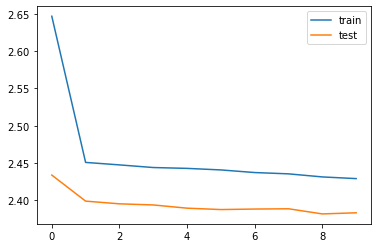

In [79]:
# Perform Fourier Transform on the training data
X_train_fourier = np.abs(fft(X_train))
X_test_fourier = np.abs(fft(X_test))

# Scale the data
scaler = MinMaxScaler()
X_train_fourier = scaler.fit_transform(X_train_fourier)
X_test_fourier = scaler.transform(X_test_fourier)

# Build the Neural Network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_fourier.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(y_train.shape[1], activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model
history = model.fit(X_train_fourier, y_train, epochs=10, batch_size=32, validation_data=(X_test_fourier, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Results of Neural Network are poor, mainly because of complecity of the model that is trained on limited data. Overfitting is main issue here leading to generalization to new data.